# Hotel Review NLP 2


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import time
np.random.seed(123)



### Load data


In [69]:
hotel_df_train= pd.read_csv('data/clean_data/clean_train_dataframe.csv')
hotel_df_test= pd.read_csv('data/clean_data/clean_test_dataframe.csv')

In [70]:
hotel_df_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
hotel_df_test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Check missing value
hotel_df_train.isna().any().any()

False

In [73]:
hotel_df_test.isna().any().any()

False

There is no missing value in both train and test set

Delcare the feature and the target variable and do scaling

In [74]:
y_train= hotel_df_train['rating']
X_train= hotel_df_train.drop(columns='rating')
y_test= hotel_df_test['rating']
X_test= hotel_df_test.drop(columns='rating')


In [75]:
print(f'X_train  shape: {X_train.shape}')
print(f'y_train  shape: {y_train.shape}')
print(f'X_test  shape: {X_test.shape}')
print(f'X_train  shape: {y_test.shape}')
print(f'Total size of train and test set: {X_train.shape[0]+ X_test.shape[0]} rows and {X_train.shape[1]} colmuns')

X_train  shape: (12798, 2743)
y_train  shape: (12798,)
X_test  shape: (4267, 2743)
X_train  shape: (4267,)
Total size of train and test set: 17065 rows and 2743 colmuns


### Modeling


#### Question1: Logistic Regression

We are scaling the data with Standard Scaler

In [77]:
scaler= StandardScaler()
X_train_ss= scaler.fit_transform(X_train)
X_test_ss= scaler.transform(X_test)

Run Logistic model

In [144]:
# Initiate
logis_model= LogisticRegression(solver='lbfgs')
#fit
s_time= time.time()
logis_model.fit(X_train_ss, y_train)

logis_pred= logis_model.predict(X_test_ss)
logis_test_score= logis_model.score(X_test_ss, y_test)
e_time= time.time()

print(f'Model Score : {logis_test_score}')
print(f'Time to run model with the original number of feature: {e_time- s_time}')


Model Score : 0.7328333723927818
Time to run model with the original number of feature: 2.2542941570281982


/Users/henryvuong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To looking for top 20 word which appear most. We are looking for the top 20 word with the highest coefficient in the list of negative word, and top 20 in positive word

In [79]:
#check to coefficent 
coef_= logis_model.coef_
coef_

array([[-0.02299382,  0.479883  ,  0.28576248, ...,  0.12776648,
        -0.02016961,  0.01179219]])

In [145]:
#check the lable
X_train.columns

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review',
       'lat', 'lng', 'weekday_of_review',
       ...
       'n_world', 'n_worry', 'n_worth', 'n_would', 'n_write', 'n_wrong',
       'n_year', 'n_yes', 'n_yet', 'n_young'],
      dtype='object', length=2743)

We are going to put the coefficent of each feature in the dataframe to be able to  take the top 20 word which predict the most positive and negative review

In [81]:
#Create Data Frame
feature_coef= pd.DataFrame({'feature': X_train.columns, 'coef_':coef_[0]})
feature_coef.head()

,feature,coef_
0,Additional_Number_of_Scoring,-0.022994
1,Average_Score,0.479883
2,Review_Total_Negative_Word_Counts,0.285762
3,Total_Number_of_Reviews,-0.034038
4,Review_Total_Positive_Word_Counts,-0.188445


In [82]:
#rank them by coef
feature_coef.sort_values('coef_', inplace=True, ascending=False)

In [83]:
#seprate the word from negative and positive
positive_review= feature_coef[feature_coef['feature'].str.startswith('p')]
negative_review= feature_coef[feature_coef['feature'].str.startswith('n')]

In [84]:
positive_review

,feature,coef_
812,p_gift,0.541586
733,p_excellent,0.517700
880,p_incredible,0.451323
731,p_exceed,0.416770
874,p_impeccable,0.404089
...,...,...
1021,p_nothing,-0.238509
498,p_awful,-0.254220
603,p_comment,-0.258541
939,p_location,-0.308302


In [85]:
#top 20 positive word
t20_pos= positive_review.head(20)

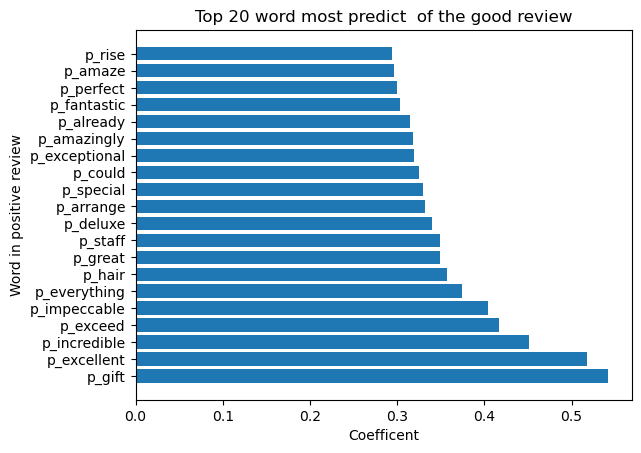

In [86]:
plt.figure()
plt.barh(t20_pos['feature'], t20_pos['coef_'] )
plt.title('Top 20 word most predict  of the good review')
plt.xlabel('Coefficent')
plt.ylabel('Word in positive review')
plt.show()

In [87]:
negative_review

,feature,coef_
2027,n_inn,0.707557
2208,n_nothing,0.360631
1980,n_height,0.353064
2728,n_wonderful,0.345873
2637,n_tricky,0.340881
...,...,...
2539,n_star,-0.513716
1691,n_confirmation,-0.525449
2729,n_wood,-0.577219
2167,n_moment,-0.744598


In [88]:
#top 20 negative
t20_neg= negative_review.head(20)

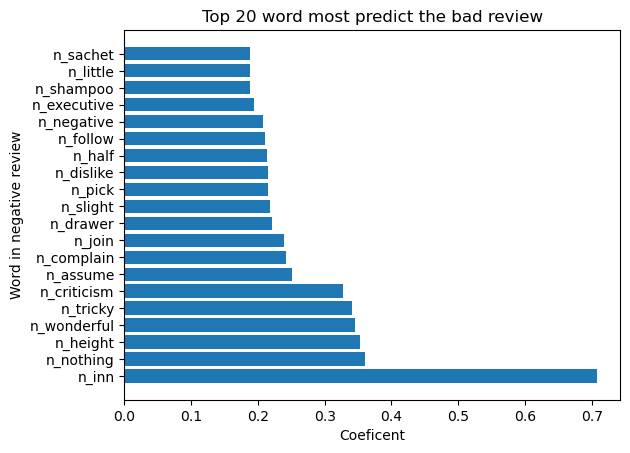

In [89]:
plt.figure()
plt.barh(t20_neg['feature'], t20_neg['coef_'])
plt.title('Top 20 word most predict the bad review')
plt.xlabel('Coeficent')
plt.ylabel('Word in negative review')
plt.show()

Since the clean dataset has more than 2000 of features, we can  reduce number of feature by using PCA. It help to simplify the dataset with less feature and might help the model run faster

/Users/henryvuong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/henryvuong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

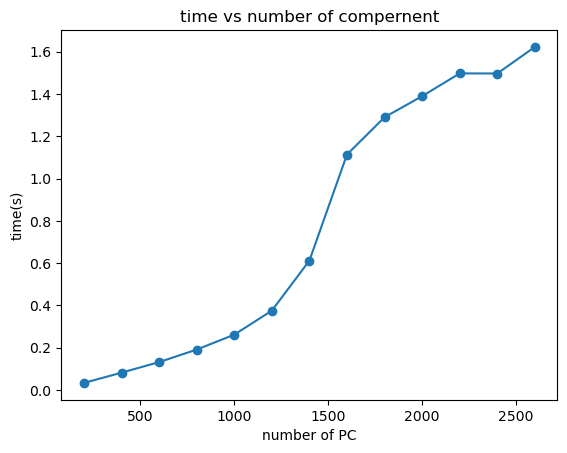

In [90]:
import time

score_pca_list= []
n_compo= range(200, 2700, 200)
timming=[]
for n in n_compo:
    pca= PCA(n_components=n)
    pca.fit(X_train_ss, y_train)
    X_train_pca= pca.transform(X_train_ss)
    X_test_pca= pca.transform(X_test_ss)
    #get the time point when start logistic model 
    start_time= time.time()
    logis_model.fit(X_train_pca, y_train)
    y_pre_pcs= logis_model.predict(X_test_pca)
    score_pca_list.append(logis_model.score(X_test_pca, y_test))
    #get the time point when end 1 loop 
    end_time= time.time() 
    # calculate the time
    timming.append(end_time-start_time)

plt.figure()
plt.plot(n_compo, timming, marker='o')
plt.title(f'time vs number of compernent')
plt.xlabel('number of PC')
plt.ylabel('time(s)')
# plt.plot(n_compo, timming, label= 'n vs time')
plt.show()

As we can see the time to run the Logistic Regression without doing the feature reduction is : ~1.796s, when we reduce the number of dimentions, it is  obviously to see that the runtime is less than the original data and when we reduce the number of PCs. It means that the number of dimentios and run-time of logistic regression have the linear relationship.

Pros and cons of dimensionality reduction:

    -   Pros:
        -   Reduce the run-time of the same model
        -   Reduce the demention could help to easy visualization the data.
        -   It could help reduce the data size.
    -   Cons:
        -   The first thing is it may cause to some loss data or information.
        -   It could make the interpretation harder because the feature after reduce is not have the same meaning as the original feature.


#### Question 2: KNN

In [91]:
# Initiate 
s_time= time.time() #start count time
knn_model= KNeighborsClassifier(n_neighbors=5)
# Fit
knn_model.fit(X_train, y_train)
#predict and accurancy
knn_pred= knn_model.predict(X_test)
knn_accurancy= accuracy_score(y_test, knn_pred)
e_time= time.time()# end time
print(f'KNN accurancy score: {knn_accurancy}')
print(f'Running time of the original data: {e_time- s_time}')


KNN accurancy score: 0.648464963674713
Running time of the original data: 2.1947078704833984


Reduce the number of observation

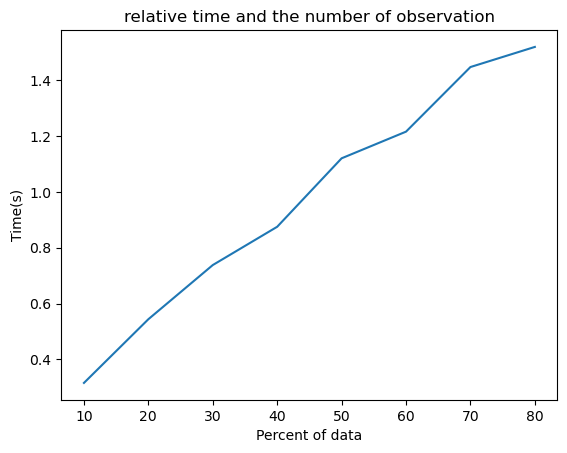

In [92]:
sample= np.arange(0.1, 0.9, 0.1)

timming=[]
for i in sample:
    
    X_sample_train= X_train.sample(frac=i, random_state=1)
    y_sample_train= y_train.sample(frac=i, random_state=1)
    start_time= time.time()
    knn_model=KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_sample_train, y_sample_train)

    knn_pred= knn_model.predict(X_test)
    knn_accurancy= accuracy_score(y_test, knn_pred)

    end_time= time.time()
    timming.append(end_time- start_time)

plt.figure()
plt.plot(sample * 100, timming)
plt.title('relative time and the number of observation')
plt.xlabel('Percent of data')
plt.ylabel('Time(s)')
plt.show()

From the visual above, We can see that the run-time increase when the amount of data increase. So we can say that there is a linear relationship between them.

Pros and cons when reduce the  number of observation:

    - Pros: Mostly when we have the big dataset
        - Reduce the running time of the same model.
        - Reduce datasize, if the dataset is too large then it would help when reduce the number of data to be able to load in notebook.
    -  Cons: Mostly when we have small dataset
        - Lossing information
        - If the dataset is small and we reduce the number of observation, it could lead to the overfitting when the number of example is reduce.

##### Optimal model.



In [93]:
#check size of data before split

print(f'Train set size: {X_train.shape}')

Train set size: (12798, 2743)


In [94]:
#Split train set to train and validate

X_train_split, X_val, y_train_split, Y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#check size of Test, train anc validate dataset

print(f'Shape of test: {X_test.shape}')
print(f'Shape of train: {X_train_split.shape}')
print(f'Shape of validate: {X_val.shape}')
print(f'Total size: {X_test.shape[0]+ X_train_split.shape[0] + X_val.shape[0]}')


Shape of test: (4267, 2743)
Shape of train: (10238, 2743)
Shape of validate: (2560, 2743)
Total size: 17065


We are going to run the the `n_neighbors` from 1-> 24 to see which is the best number of neighbors

In [95]:
neignour= range(1, 25)
train_score=[]
val_score=[]
X_train_scale= scaler.fit_transform(X_train_split)
X_val_scale= scaler.transform(X_val)

for i in neignour:
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scale, y_train_split)

    val_score.append(knn_model.score(X_val_scale,Y_val))
    train_score.append(knn_model.score(X_train_scale, y_train_split))

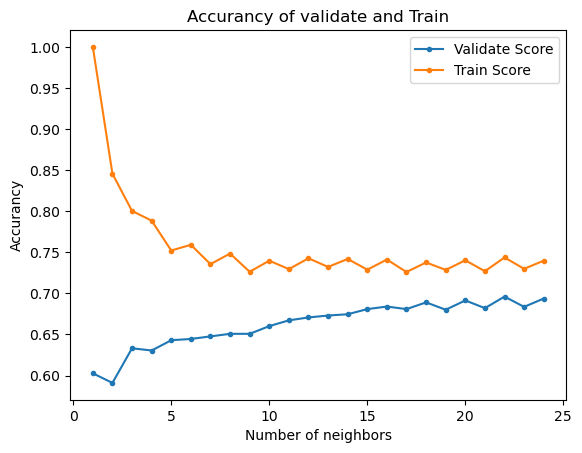

In [96]:
plt.figure()
plt.plot(neignour, val_score, label= "Validate Score", marker='.')
plt.plot( neignour, train_score, label= "Train Score", marker= '.')
plt.xlabel('Number of neighbors')
plt.ylabel('Accurancy')
plt.title('Accurancy of validate and Train')
plt.legend()
plt.show()

We are looking for the point where the diffence between train score and validate score is smallest.

In [97]:
#looking for the point where the distance between train and test score is smallest
best_index= np.argmin(np.abs(np.array(train_score)- np.array(val_score)))
print(f'The number of neighbors give the best model is :{neignour[best_index]} and its score: {val_score[best_index]}')

The number of neighbors give the best model is :21 and its score: 0.68203125


In [98]:
#Run the KNN model with the n_neighbors is 21

knn21_model= KNeighborsClassifier(n_neighbors=21)
#fit
knn21_model.fit(X_train_ss, y_train)

print(f'Test accurency of the optimal model= {knn21_model.score(X_test_ss, y_test)}')
print(f'Train accurency of the optimal model= {knn21_model.score(X_train_ss, y_train)}')


Test accurency of the optimal model= 0.6878368877431451
Train accurency of the optimal model= 0.7275355524300672


The issue of the split the train and validation after doing the vectorization is we are expecting the validate as the unseen data and use this instead of test set  to find out the best hyperparameter for the model to prevent the bias when we test the model with the test set. So if we do the vectorization before split, it some how transform the train and validate with the same representative and could lead to the bias when we run the train and validate.

#### Question 3: Decision Tree

In [99]:
# Initiate
dt_model= DecisionTreeClassifier(max_depth=5)
#fit
dt_model.fit(X_train, y_train)

#predict and accurancy
dt_pred= dt_model.predict(X_test)
dt_score= dt_model.score(X_test, y_test)

print(f'The accurancy for the test set: {dt_score}')

The accurancy for the test set: 0.739629716428404


To be able to find out the optimal max_depth for the Decision Tree, We are using the `X_train_split`, `X_val`, `y_train_split`, `Y_val` which we already done when we process the KNN model.

In [100]:
depth_list= range(2, 25)
train_score=[]
val_score=[]

for depth in depth_list:
    dt_model= DecisionTreeClassifier(max_depth= depth)
    #fit
    dt_model.fit(X_train_split, y_train_split)
    # predict and score
    # dt_pred= dt_model.predict(X_val)
    train_score.append( dt_model.score(X_train_split, y_train_split))
    val_score.append(dt_model.score(X_val, Y_val))

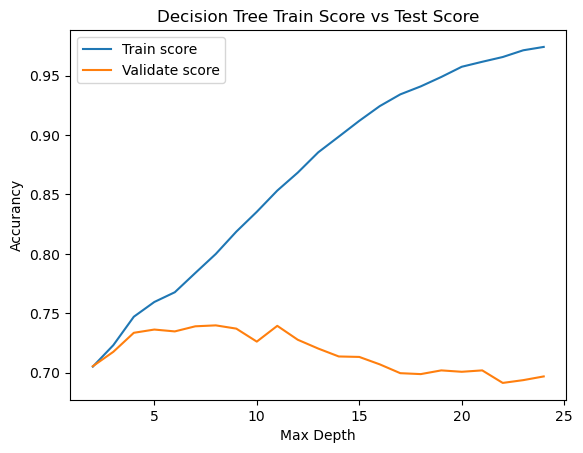

In [101]:
plt.figure()
plt.plot(depth_list, train_score, label= 'Train score')
plt.plot(depth_list, val_score, label= 'Validate score')
plt.title('Decision Tree Train Score vs Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Accurancy')
plt.legend()
plt.show()

The optimal `max_depth` will give the best accurancy for the validate dataset.


In [102]:
best_depth= val_score.index(max(val_score))
print(f' The optimal max_depth for Decision Tree is : {depth_list[best_depth]} and its validation accurency: {val_score[best_depth]}')

 The optimal max_depth for Decision Tree is : 8 and its validation accurency: 0.73984375


In [103]:
#Run Decision Tree with max_depth=8
dt_model= DecisionTreeClassifier(max_depth=8)
#fit
dt_model.fit(X_train, y_train)
score= dt_model.score(X_test, y_test)

print(f'The score for optimal max_depth is : {score}')

The score for optimal max_depth is : 0.7466604171549098


As the research on [towards data science](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222#:~:text=Both%20are%20non%2Dparametric%20methods,KNN%27s%20expensive%20real%20time%20execution.). Two advantage of decision tree vs KNN is :

        - Decision tree is supported automatic feature interaction when KNN is not.
        - Decision tree is faster due to KNN is expensive real time execution.
Two disadvantage of decision tree is :

        - It could bring the chance of overfitting when we keep building the tree to get the high purity.
        - When we training the data which is too complicate, it could make the tree grow to very complex.

#### Question 4

The main purpose of split train set in to the train and validation set is able to find out the best hyperparameter of the model to be able to improve the performance  of the model, also help for model selection process.

The difference between validate and test is: 

| Validate set | Test set   |
|------|------|
|   The validate set is use to tune the hyperparameter and model selection  | the test set use for model evaluation|
|   The validation set using iteratively in the training process | the test set using only at the last step of the checking the accuracy|
         
        

#### Question 5

In [104]:
#scale data
X_train_cross=scaler.fit_transform(X_train)
X_test_cross= scaler.transform(X_test)

print(f'X_train_cross  shape: {X_train_cross.shape}')
print(f'y_train  shape: {y_train.shape}')
print(f'X_test_cross  shape: {X_test_cross.shape}')
print(f'X_train  shape: {y_test.shape}')
print(f'Total size : {X_train_cross.shape[0]+ X_test_cross.shape[0]}')

X_train_cross  shape: (12798, 2743)
y_train  shape: (12798,)
X_test_cross  shape: (4267, 2743)
X_train  shape: (4267,)
Total size : 17065


##### Logistic regression with cross validation


In [105]:
cross_validation_score= []
C_range=[ 10**i for i in range(-7, 7)]

# Do cross validation
for c in C_range:
    Logis_model_cross= LogisticRegression(C= c,solver='lbfgs' ,random_state=1)
    #store the score of cross-validation
    score= cross_val_score(Logis_model_cross, X_train_cross, y_train, cv=5)
    cross_validation_score.append(np.mean(score))


/Users/henryvuong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/henryvuong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [106]:
cross_validation_score

[0.5761056259769441,
 0.5766525620359515,
 0.6433816920672137,
 0.7684794780676045,
 0.7752773300117234,
 0.7568359832942555,
 0.7346459188159438,
 0.723550031750684,
 0.7201118601016022,
 0.7195649240425949,
 0.7201900461606096,
 0.7199555795720984,
 0.7197992990425948,
 0.7196430490425947]

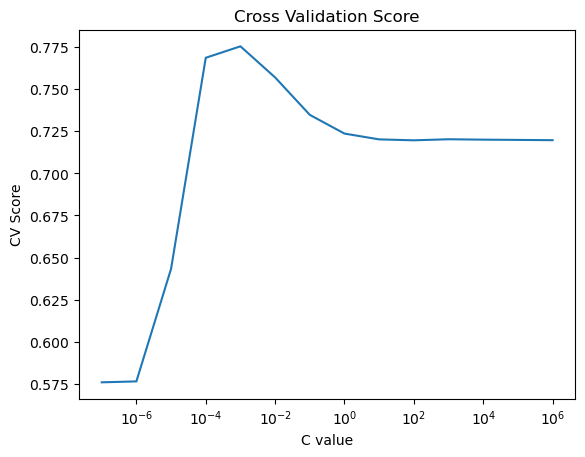

In [107]:
plt.figure()
plt.plot(C_range, cross_validation_score)
plt.title('Cross Validation Score')
plt.xlabel('C value')
plt.ylabel('CV Score')
plt.xscale('log')
plt.show()

Base on the visulazation, the best C = 10 <sup>-3<sup>

The cross validation score for this is: 0.775

In [108]:
Logis_model_cross= LogisticRegression(C=0.001, solver='lbfgs', random_state=1)
logis_pred= Logis_model_cross.fit(X_train_ss, y_train)

logis_pred= Logis_model_cross.predict(X_test_ss)
logis_score= Logis_model_cross.score(X_test_ss, y_test)
cf_matrix= confusion_matrix(y_test, logis_pred)

Confusion Matrix

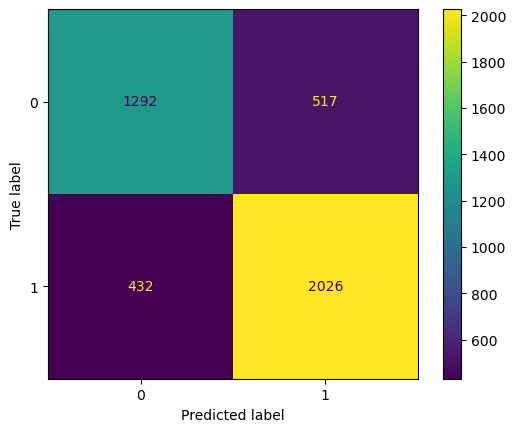

In [109]:
#display confusion matrix
dis= ConfusionMatrixDisplay(cf_matrix)
dis.plot()
plt.show()

In [141]:
print(classification_report(y_test, logis_pred))
print(f'The score of  the model:{logis_score}')

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1809
           1       0.80      0.82      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267

The score of  the model:0.777595500351535


Base on the confusion matrix and we also call out the classification report, The acurancy of this model is 78 percent also the recall score and precision score is quite balance so we could say that the model has balance between identifying positive instances and accurately predicting positive instances. It also not delivery and bias during the training process.

#### Question 6

If have to add 1 more feature in the dataset, I would add the column `Travel_Season` in to the dataset. Because we can see that the review came in the peak time or not and may have more understand about the reason why they get good or bad review. The number of using in the short period of time could bring the not good experience for the reivewer.

As we do some research, the peak-time for travelling in Europe is : **May-June** and **September-October**, so we assign that the review in those month with be labeled as 1 and other will be labeled 0

##### Create new feature

In [111]:
#make a copy df
train_copy= hotel_df_train.copy()
test_copy= hotel_df_test.copy()

In [132]:
#add the 'Travel_Season' in the the data frame
month_travel= [5, 6, 9, 10]
train_copy['Travel_Season']= np.where(train_copy['month_of_review'].isin(month_travel), 1,0)
test_copy['Travel_Season']= np.where(test_copy['month_of_review'].isin(month_travel) , 1,0)

In [133]:
#check
test_copy[['Travel_Season', 'month_of_review']].head()

,Travel_Season,month_of_review
0,1,10
1,0,7
2,0,12
3,0,11
4,0,7


In [134]:
test_copy['Travel_Season'].value_counts()

0    2942
1    1325
Name: Travel_Season, dtype: int64

In [113]:
#Check

train_copy[['Travel_Season', 'month_of_review']].head()

,Travel_Season,month_of_review
0,0,1
1,1,10
2,0,3
3,0,2
4,0,11


In [122]:
train_copy['Travel_Season'].value_counts()

0    8822
1    3976
Name: Travel_Season, dtype: int64

##### Run Logistic model

In [116]:
X_train_copy= train_copy.drop(columns='rating')
y_train_copy= train_copy['rating']
X_test_copy= test_copy.drop(columns='rating')
y_test_copy= test_copy['rating']

Re-run `Logistic Regression` cross validation = 5

In [117]:
#scale copy data
X_train_copy_ss= scaler.fit_transform(X_train_copy, y_train_copy)
X_test_copy_ss= scaler.fit_transform(X_test_copy, y_test_copy)

In [118]:
#shape
print(f'Shape of train: {X_train_copy_ss.shape}')
print(f'Shape of test: {X_test_copy_ss.shape}')

Shape of train: (12798, 2744)
Shape of test: (4267, 2744)


In [119]:
cross_validation_score= []
C_range=[ 10**i for i in range(-7, 7)]

# Do cross validation
for c in C_range:
    Logis_model_cross= LogisticRegression(C= c,solver='lbfgs' ,random_state=1)
    #store the score of cross-validation
    score= cross_val_score(Logis_model_cross, X_train_copy_ss, y_train_copy, cv=5)
    cross_validation_score.append(np.mean(score))


/Users/henryvuong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/henryvuong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [124]:
cross_validation_score

[0.5761056259769441,
 0.5766525620359515,
 0.6434598475967175,
 0.7688701641266119,
 0.7752772384232122,
 0.7562110443532629,
 0.7351145772274326,
 0.7237063122801877,
 0.7198773324540837,
 0.7197992379835874,
 0.7200336129835874,
 0.7202680185130912,
 0.7198773629835873,
 0.7199555795720985]

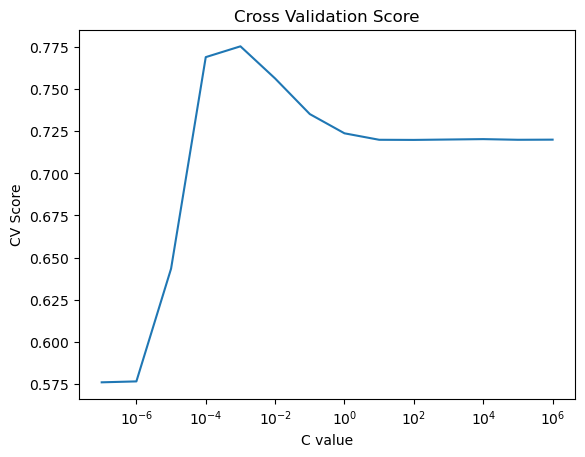

In [123]:
plt.figure()
plt.plot(C_range, cross_validation_score)
plt.title('Cross Validation Score')
plt.xlabel('C value')
plt.ylabel('CV Score')
plt.xscale('log')
plt.show()


In [135]:
best_c= C_range[cross_validation_score.index(max(cross_validation_score))]
print(f'The best C number is : {best_c} ')

The best C number is : 0.001 


The C number which bring the most optimal model here is C= 0.001 it is not change with the original data. Let see with the addition feature, is it going to improve our model performane?


In [138]:
logis_extra_feature= LogisticRegression(C= 0.01, solver='lbfgs', random_state=1)

#fit
logis_extra_feature.fit(X_train_copy_ss, y_train_copy)

logis_ex_pred= logis_extra_feature.predict(X_test_copy_ss)
logis_ex_score= logis_extra_feature.score(X_test_copy_ss, y_test_copy)

cf_matrix_ex= confusion_matrix(y_test_copy, logis_ex_pred)

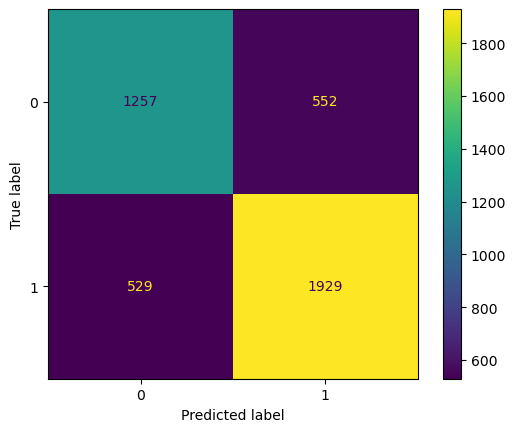

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1809
           1       0.78      0.78      0.78      2458

    accuracy                           0.75      4267
   macro avg       0.74      0.74      0.74      4267
weighted avg       0.75      0.75      0.75      4267

Model score is: 0.7466604171549098


In [143]:
#display confusion matrix
dis= ConfusionMatrixDisplay(cf_matrix_ex)
dis.plot()
plt.show()

print(classification_report(y_test_copy, logis_ex_pred))
print(f'Model score is: {logis_ex_score}')

As we can see from this confusion metrix with added the `Travel_Season` feature and compare with the previous matrix without the `Travel_Season` we can see that the accuracy of the model with feature added in is reduce but we also see it make the balance between the precision and recall, which is in somehow help to reduce the bias when we run the model.
